# Random Walk

In [1]:
options(repr.plot.width=10, repr.plot.height=5)

In [2]:
NonStatRandomWalk <- function(len=100, process=1){
    "
    This function generates Non Stationary Time Series.
    "
    X = matrix(, nrow = len, ncol = process)

    X[1, 1:process] <- rep(30, process)
    for(i in 2:len){
        X[i, 1:process] <- X[i-1, 1:process] + rnorm(process)
    }

    return(ts(X))
}

# This pocess is not stationay because both variance and expectation is dependet on time.

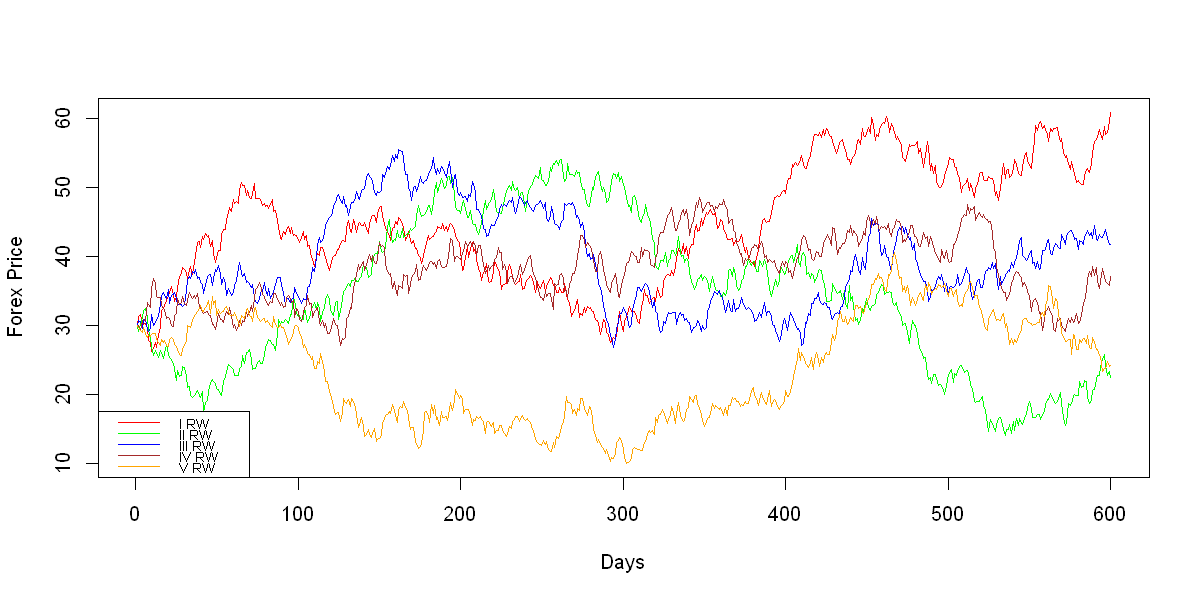

In [3]:
X <- NonStatRandomWalk(600, 5)

matplot(X, type = 'l', 
        col=c("red", "green", "blue", "brown", "orange"), 
        lty = c(1, 1, 1, 1, 1), xlab = "Days", ylab="Forex Price")

legend(x = "bottomleft", 
       legend = c("I RW", "II RW", "III RW", "IV RW", "V RW"), 
       col = c("red", "green", "blue", "brown", "orange"), 
       lty = rep(1,5), 
       cex=0.7)

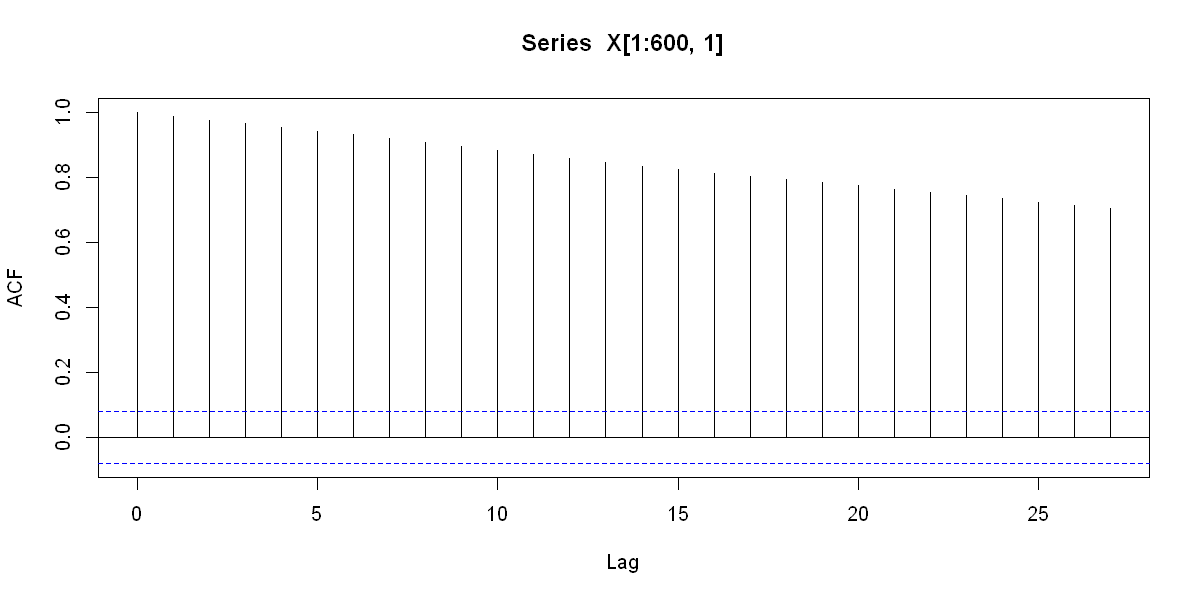

In [4]:
# We ususally calcualte Autocorrelation for stationary time series.
# But let's try it for the first time series.

plot(acf(X[1:600,1]))

# High correlation shows there is no stationarity.

In [5]:
StatRandomWalk <- function(len=100, process=1, lag=1){
    "
    This function generates Stationary Time Series.
    Lower the value of lag less autocorrelation will be there.
    "
    X <- NonStatRandomWalk(len = len+lag, process = process)
    X <- as.matrix.data.frame(diff(X, lag = lag))
    return(ts(X))
}

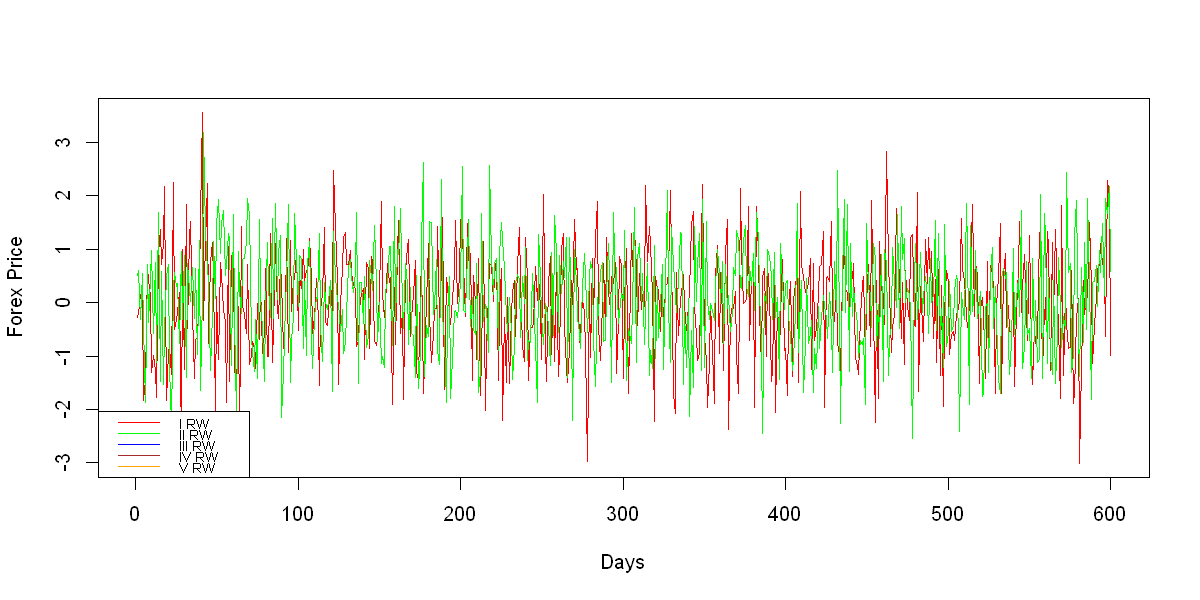

In [6]:
Y <- StatRandomWalk(600, 2, lag = 1)

matplot(Y, type = 'l', 
        col=c("red", "green", "blue", "brown", "orange"), 
        lty = c(1, 1, 1, 1, 1), xlab = "Days", ylab="Forex Price")

legend(x = "bottomleft", 
       legend = c("I RW", "II RW", "III RW", "IV RW", "V RW"), 
       col = c("red", "green", "blue", "brown", "orange"), 
       lty = rep(1,5), 
       cex=0.7)

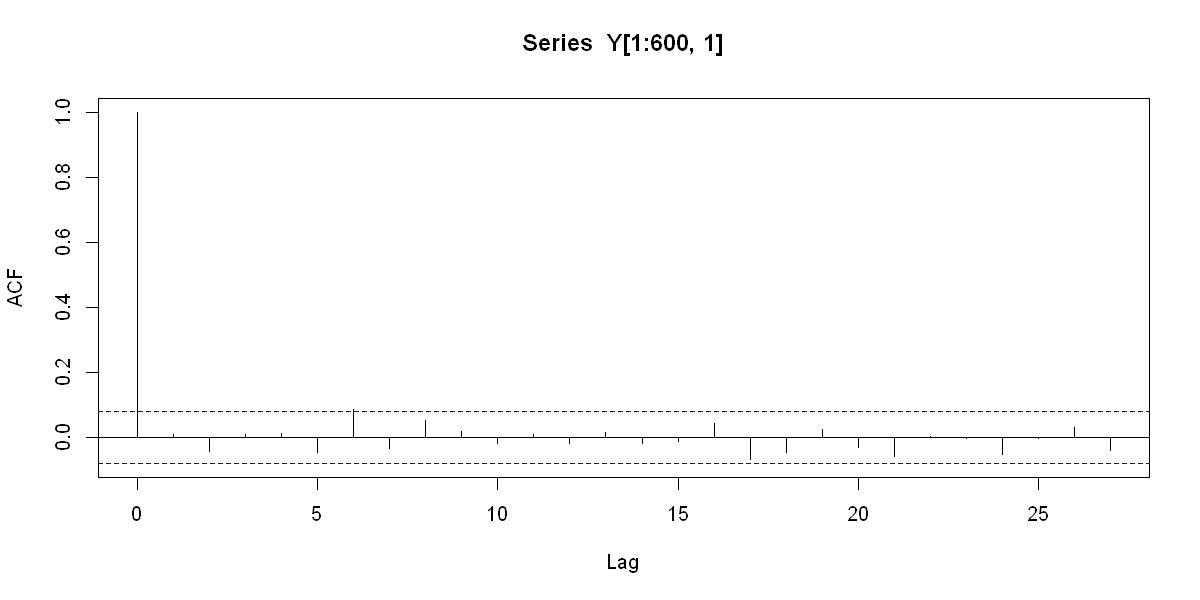

In [7]:
plot(acf(Y[1:600,1]))

# Low correlation shows there is no/weak stationarity.